<a href="https://colab.research.google.com/github/ThierrryScotto/Air-Passengers-2.0/blob/main/Air_Passengers_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [41]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import sem
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Getting the data

In [2]:
url = "https://raw.githubusercontent.com/ThierrryScotto/Air-Passengers-2.0/main/AirPassengers.csv"

dataset = pd.read_csv(url)
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Data Preparation

In [3]:
def plot_dataset(x, y, x_label, y_label, title, figsize=(12,10), dpi=90):
  plt.figure(figsize=(12, 10), dpi=90)
  plt.plot(x, y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

In [4]:
def plot_dataset_scatter(x, y, x_label, y_label, title, figsize=(12,10), dpi=90):
  plt.figure(figsize=(12, 10), dpi=90)
  plt.scatter(x, y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

In [5]:
dataset.columns

Index(['Month', '#Passengers'], dtype='object')

In [6]:
dataset.shape

(144, 2)

In [7]:
dataset = dataset.rename(columns={"#Passengers": "Passengers"})

In [8]:
dataset['Month'].astype

<bound method NDFrame.astype of 0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object>

In [9]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

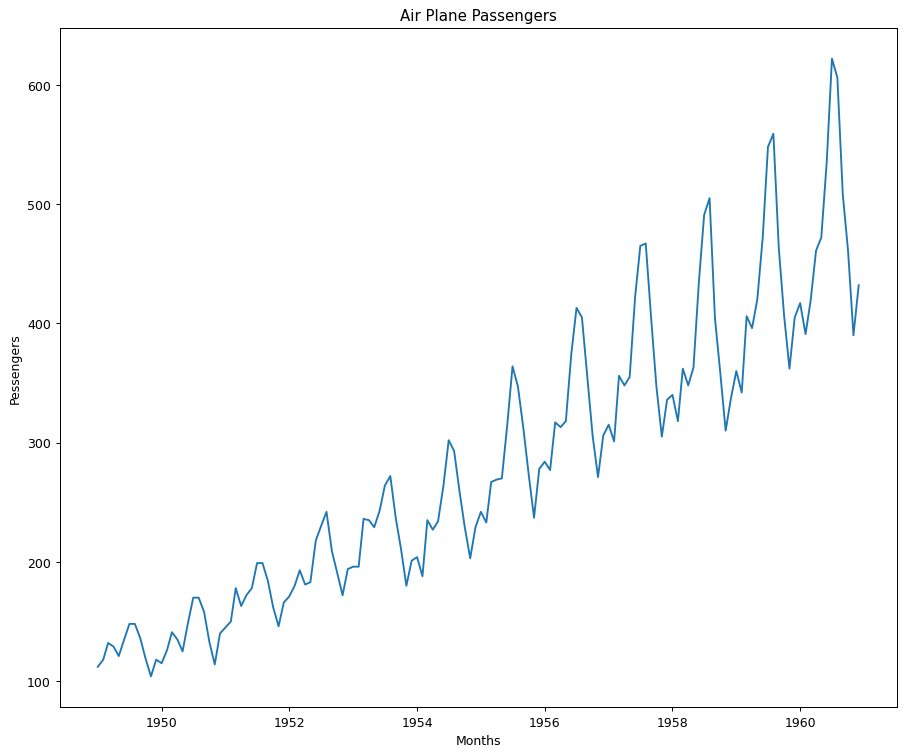

In [10]:
plot_dataset(dataset['Month'], dataset['Passengers'], "Months", "Pessengers", 'Air Plane Passengers')

In [11]:
dataset['Passengers'].head(5)

0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64

In [12]:
dataset.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [13]:
dataset.isnull().sum()

Month         0
Passengers    0
dtype: int64

set index

In [14]:
dataset = dataset.set_index("Month")
dataset = dataset.sort_index()
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Checking the SE

In [15]:
sem(np.array(dataset['Passengers']))

9.997193078578599

#### Checking if Gaussian distribution makes sense

<AxesSubplot:>

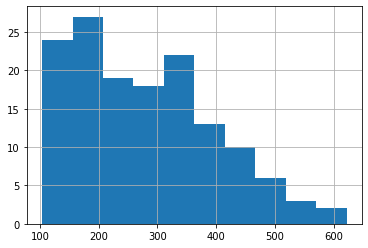

In [16]:
dataset['Passengers'].hist()

# Time Series analysis

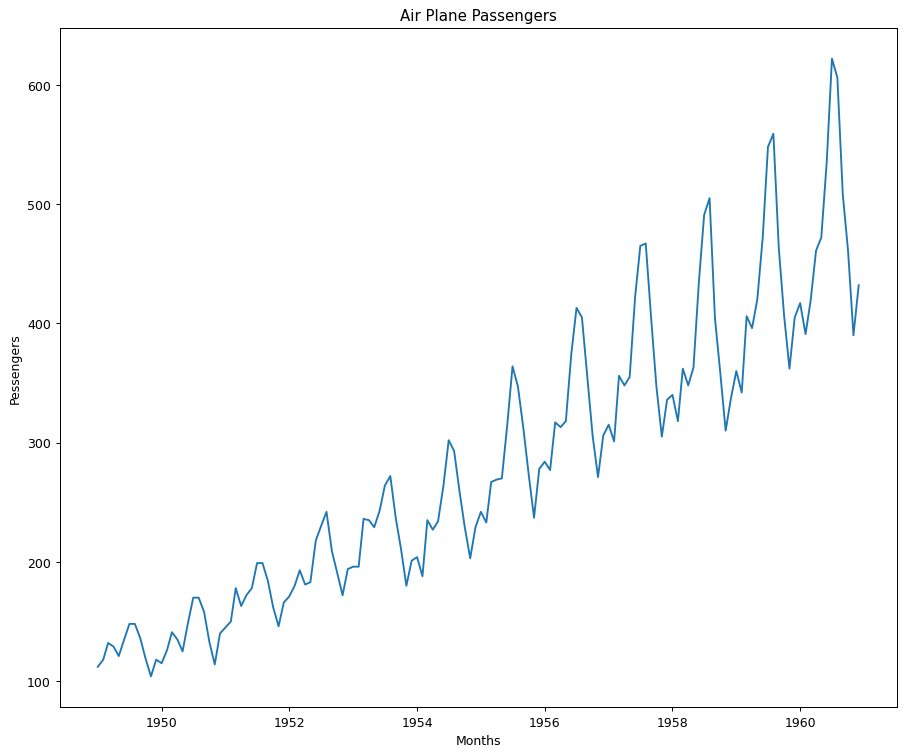

In [17]:
plot_dataset(dataset.index, dataset['Passengers'], "Months", "Pessengers", 'Air Plane Passengers')

## Decomposition

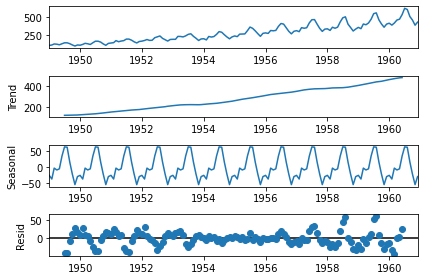

In [18]:
result = seasonal_decompose(dataset, model='additive', period=12)
result.plot()
plt.show()

### Trend

<AxesSubplot:xlabel='Month'>

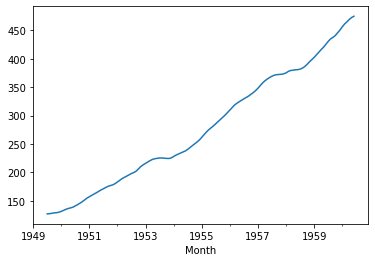

In [23]:
result.trend.plot()

### Sesanality

<AxesSubplot:xlabel='Month'>

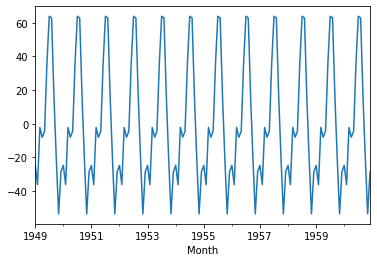

In [24]:
result.seasonal.plot()

### Residual

<AxesSubplot:xlabel='Month'>

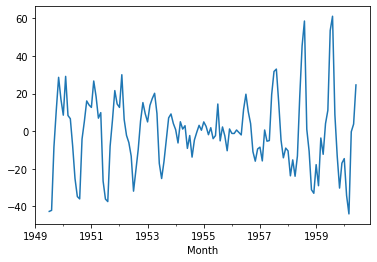

In [26]:
residual = result.resid
residual.plot()

### De-trended

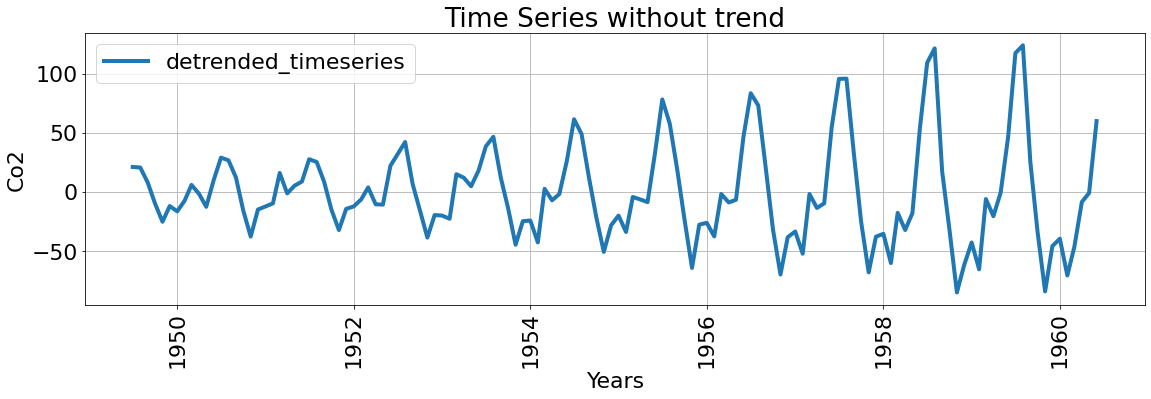

In [31]:
de_trended = dataset['Passengers'] - result.trend

plt.figure(figsize=(19,5))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(dataset.index, de_trended, marker='', linestyle='-', label='detrended_timeseries', linewidth=4)
plt.title("Time Series without trend")
plt.xlabel("Years")
plt.ylabel("Co2")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### De-seasonalised

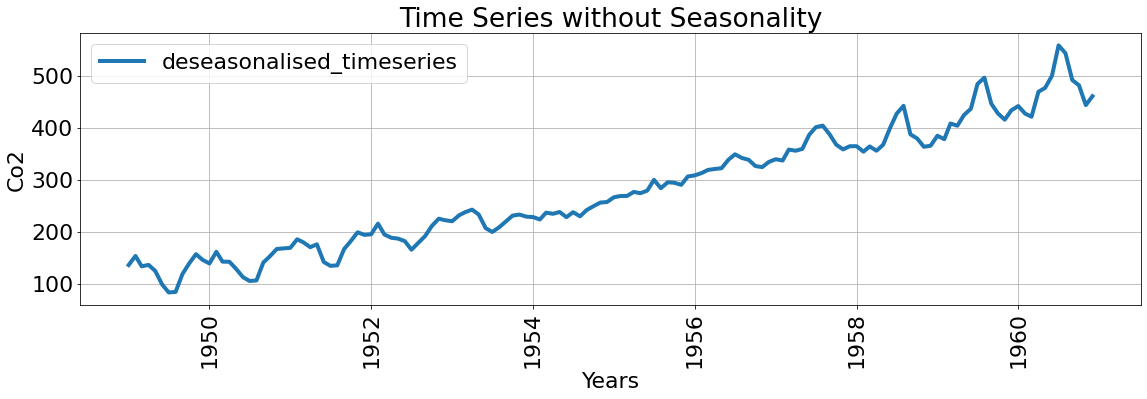

In [32]:
dataset_de_seasonalised = dataset['Passengers'] - result.seasonal

plt.figure(figsize=(19,5))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(dataset.index, dataset_de_seasonalised, marker='', linestyle='-', label='deseasonalised_timeseries', linewidth=4)
plt.title("Time Series without Seasonality")
plt.xlabel("Years")
plt.ylabel("Co2")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Residual

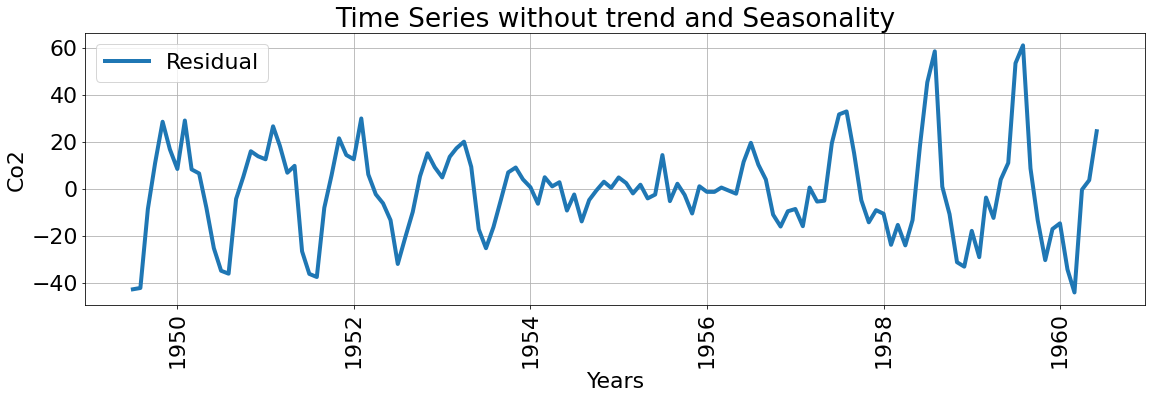

In [33]:
dataset_residuals = dataset['Passengers'] - result.trend - result.seasonal

plt.figure(figsize=(19,5))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(dataset.index, dataset_residuals, marker='', linestyle='-', label='Residual', linewidth=4)
plt.title("Time Series without trend and Seasonality")
plt.xlabel("Years")
plt.ylabel("Co2")
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Finding out if my series is stationary

### Separating the time series into two groups and calculating the mean and variance of each.

In [37]:
def mean_variance(df):
  middle =  int(len(df) / 2)

  part_1, part_2 = df.head(middle), df.tail(middle)
  mean1, mean2 = part_1.mean(), part_2.mean()
  var1, var2 = part_1.var(), part_2.var()
  print('\n-- MEAN and VARIANCE --')
  print('Average of set 1: %f, Average of set 2: %f' % (mean1, mean2))
  print('variance of set 1: %f, Variance of set 2: %f\n' % (var1, var2))

In [36]:
mean_variance(dataset)


-- MEAN and VARIANCE --
Average of set 1: 182.902778, Average of set 1: 377.694444
variance of set 1: 2275.694640, Variance of set 2: 7471.736307



### Dickey–Fuller test

In [78]:
def check_stationarity(df):
  result = adfuller(df, autolag='AIC')

  print('-- Dickey–Fuller test --')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical values: ')
  for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))
  print('\n\n')

In [40]:
check_stationarity(dataset)

-- Dickey–Fuller test --
ADF Statistic: 0.815369
p-value: 0.991880
Critical values: 
	1%: -3.481682
	5%: -2.884042
	10%: -2.578770





### Autocorrelation

In [45]:
def plot_autocorrelation(value, lags=1):
  plot_acf(value, lags=lags)
  plot_pacf(value, lags=lags, method = "ols")

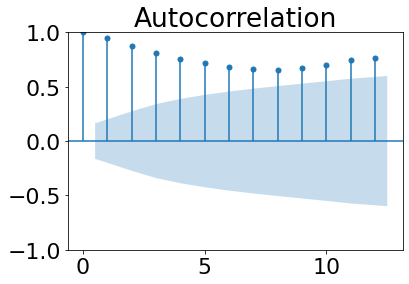

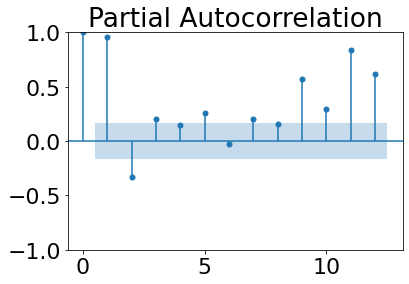

In [46]:
plot_autocorrelation(dataset, lags=12)

### Converting series to stationary

#### Log transformation

In [67]:
dataset_log = np.log(dataset)
dataset_log = dataset_log.diff().dropna()


-- MEAN and VARIANCE --
Average of set 1: 0.010074, Average of set 2: 0.008162
variance of set 1: 0.010693, Variance of set 2: 0.012308

-- Dickey–Fuller test --
ADF Statistic: -2.717131
p-value: 0.071121
Critical values: 
	1%: -3.482501
	5%: -2.884398
	10%: -2.578960





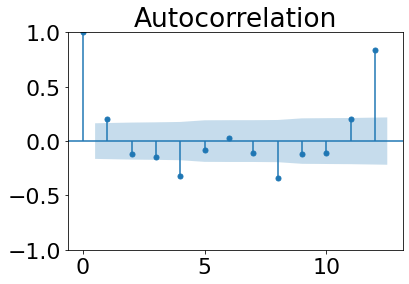

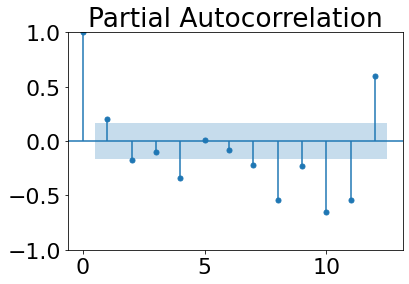

In [79]:
mean_variance(dataset_log)
check_stationarity(dataset_log)
plot_autocorrelation(dataset_log, lags=12)

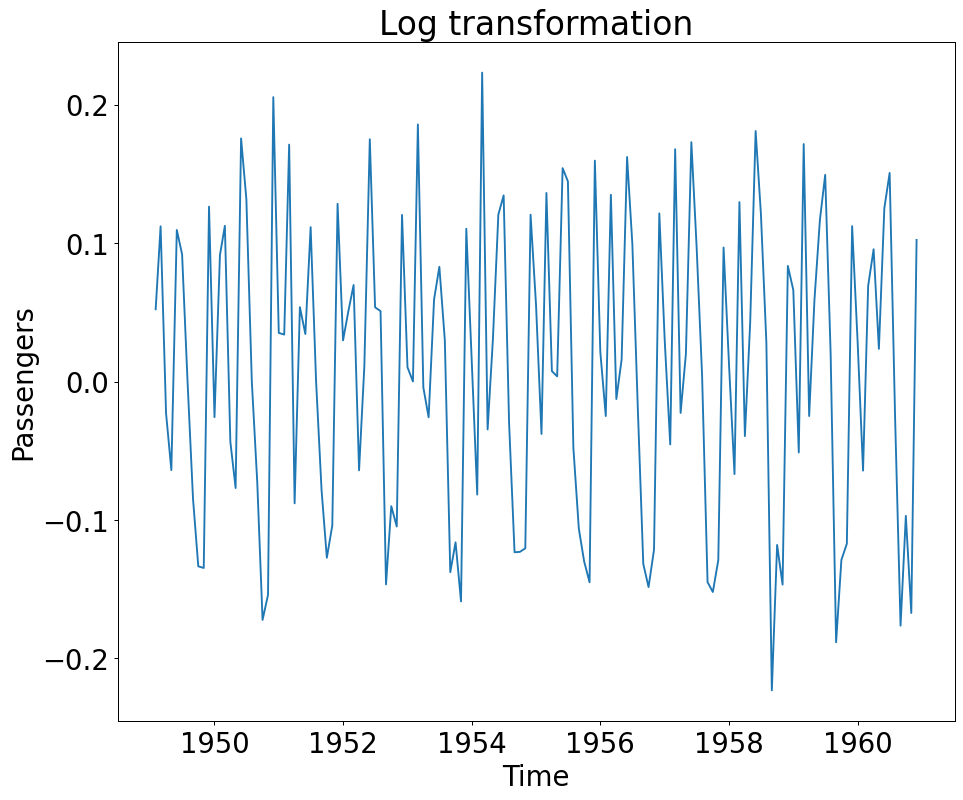

In [69]:
plot_dataset(dataset_log.index, dataset_log, 'Time', 'Passengers', "Log transformation")

#### Seasonal Difference

In [65]:
dataset_seasonal_difference = dataset['Passengers'] - dataset['Passengers'].shift(12)
dataset_seasonal_difference = dataset_seasonal_difference.dropna()
dataset_seasonal_difference

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
              ... 
1960-08-01    47.0
1960-09-01    45.0
1960-10-01    54.0
1960-11-01    28.0
1960-12-01    27.0
Name: Passengers, Length: 132, dtype: float64


-- MEAN and VARIANCE --
Average of set 1: 24.106061, Average of set 2: 39.439394
variance of set 1: 184.619347, Variance of set 2: 324.188578

-- Dickey–Fuller test --
ADF Statistic: -3.383021
p-value: 0.011551
Critical values: 
	1%: -3.481682
	5%: -2.884042
	10%: -2.578770





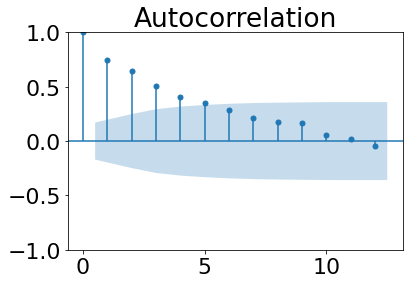

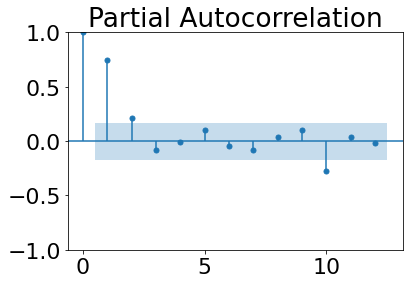

In [66]:
mean_variance(dataset_seasonal_difference)
check_stationarity(dataset_seasonal_difference)
plot_autocorrelation(dataset_seasonal_difference, lags=12)

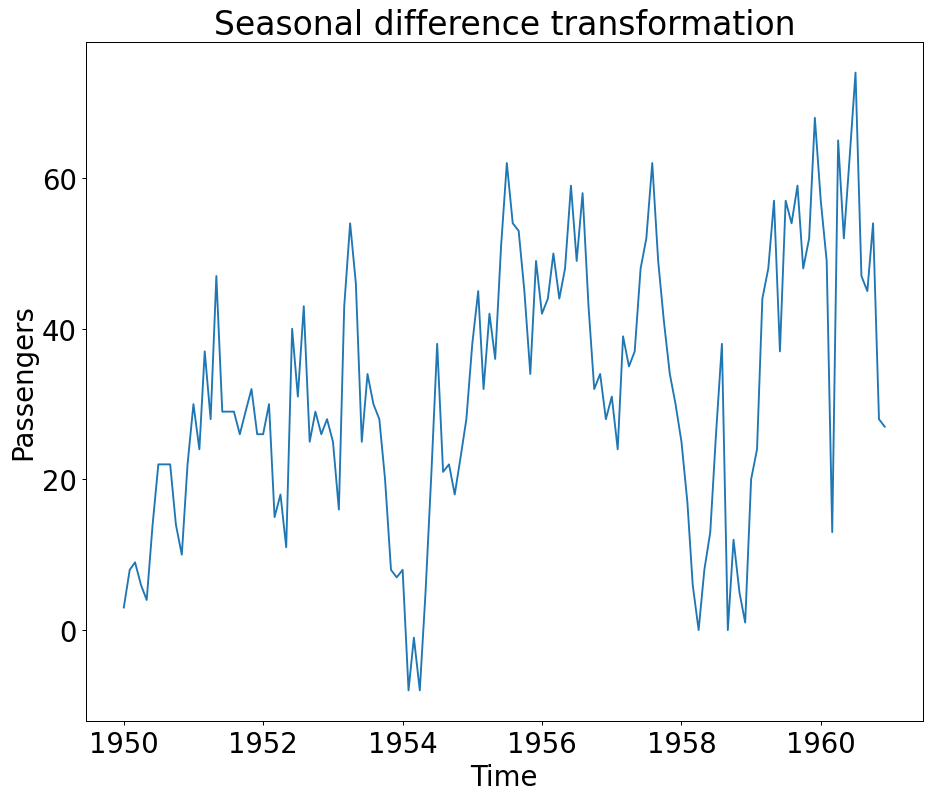

In [71]:
plot_dataset(dataset_seasonal_difference.index, dataset_seasonal_difference, 'Time', 'Passengers', "Seasonal difference transformation")

#### Diference

In [73]:
dataset_difference = dataset['Passengers'] - dataset['Passengers'].shift(1)
dataset_difference = dataset_difference.diff().dropna()
dataset_difference

Month
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
1949-06-01     22.0
1949-07-01     -1.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: Passengers, Length: 142, dtype: float64


-- MEAN and VARIANCE --
Average of set 1: 0.098592, Average of set 2: 0.408451
variance of set 1: 607.290141, Variance of set 2: 2592.302213

-- Dickey–Fuller test --
ADF Statistic: -16.384232
p-value: 0.000000
Critical values: 
	1%: -3.481682
	5%: -2.884042
	10%: -2.578770





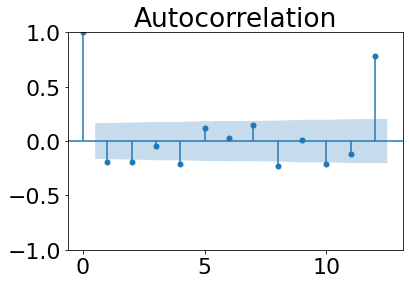

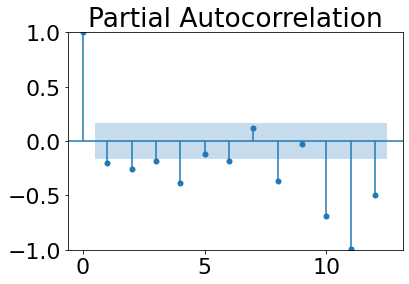

In [74]:
mean_variance(dataset_difference)
check_stationarity(dataset_difference)
plot_autocorrelation(dataset_difference, lags=12)

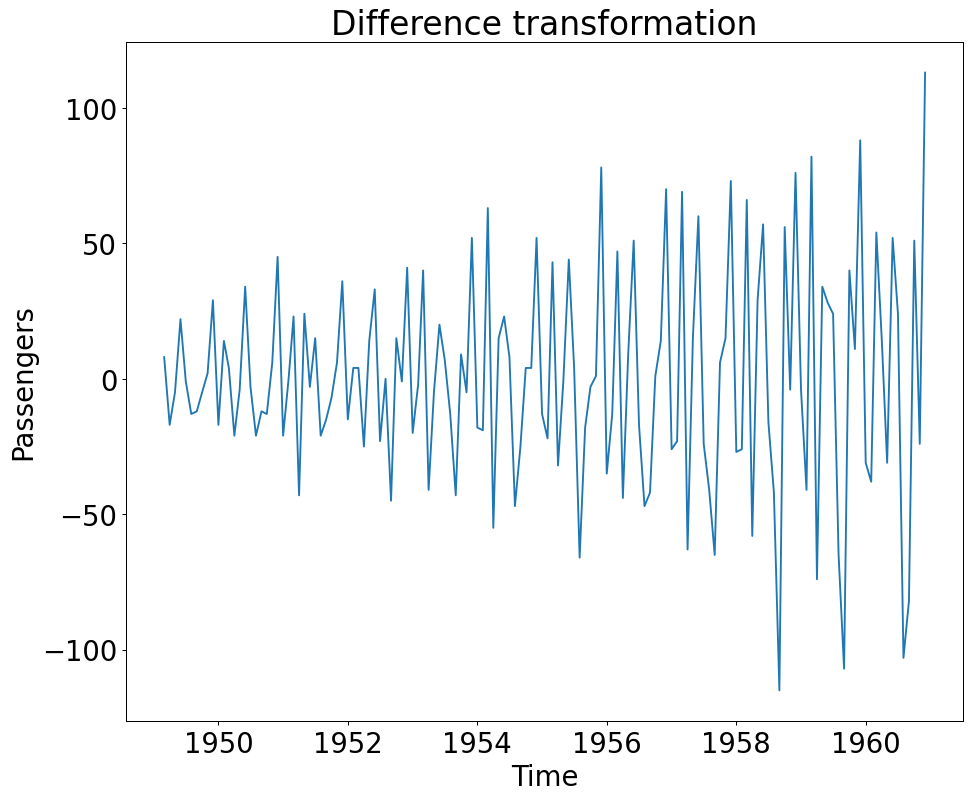

In [75]:
plot_dataset(dataset_difference.index, dataset_difference, 'Time', 'Passengers', "Difference transformation")

#### Taking the square root of the data

In [72]:
dataset_sqrt = np.sqrt(dataset)
dataset_sqrt = dataset_sqrt.diff().dropna()
dataset_sqrt

,Passengers
Month,
1949-02-01,0.279775
1949-03-01,0.626345
1949-04-01,-0.131309
1949-05-01,-0.357817
1949-06-01,0.618950
...,...
1960-08-01,-0.322861
1960-09-01,-2.078212
1960-10-01,-1.067945



-- MEAN and VARIANCE --
Average of set 1: 0.064081, Average of set 2: 0.073637
variance of set 1: 0.481244, Variance of set 2: 1.193317

-- Dickey–Fuller test --
ADF Statistic: -3.186422
p-value: 0.020784
Critical values: 
	1%: -3.481682
	5%: -2.884042
	10%: -2.578770





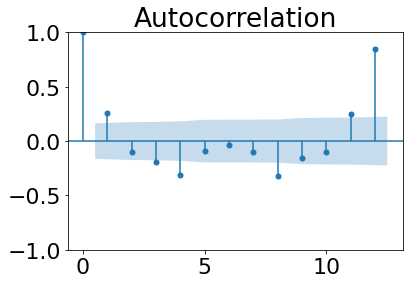

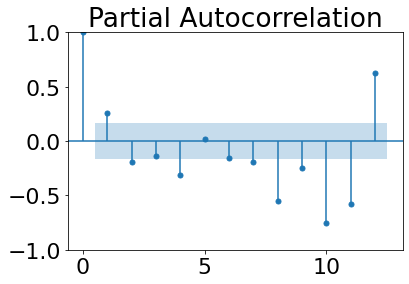

In [76]:
mean_variance(dataset_sqrt)
check_stationarity(dataset_sqrt)
plot_autocorrelation(dataset_sqrt, lags=12)

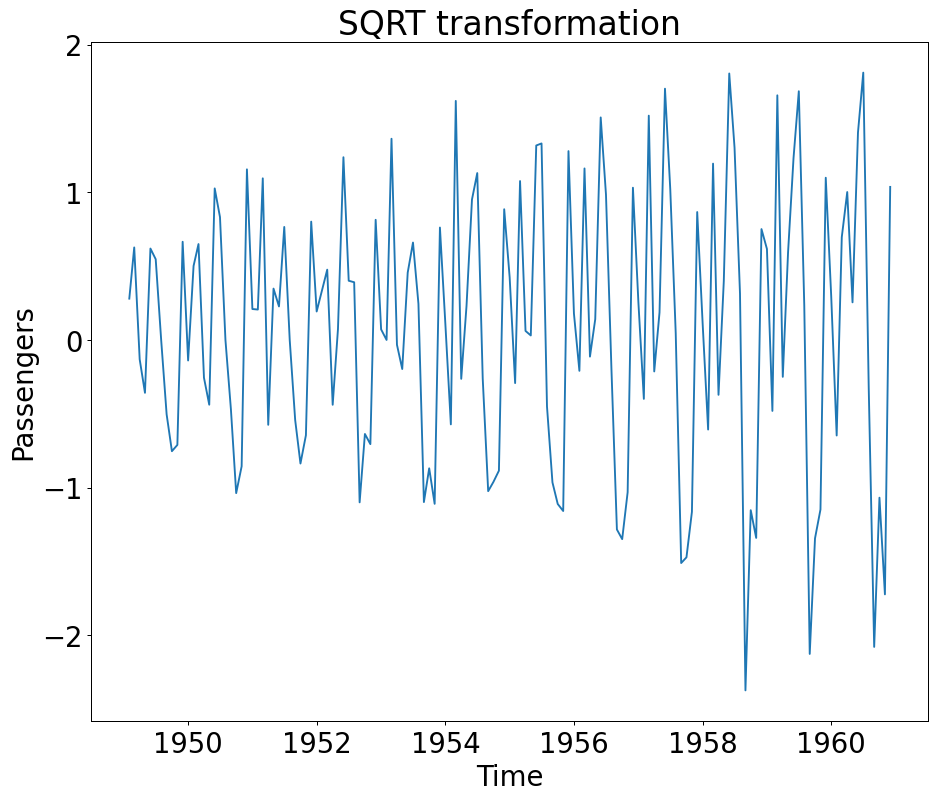

In [77]:
plot_dataset(dataset_sqrt.index, dataset_sqrt, 'Time', 'Passengers', "SQRT transformation")

## Training the model

In [80]:
dataset_log

,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083
